In [1]:
import numpy as np 
import networkx as nx
import sys, os
import matplotlib.pyplot as plt
sys.path.insert(0, '../src/')

from model.ot_gromov import entropic_gw
from model.graph import GraphOT
from util import vis_transport, gwd_growth_experiment

%matplotlib inline

In [ ]:
source = GraphOT(nx.cycle_graph(5))
target = GraphOT(nx.cycle_graph(5))

p_s = source.get_node_dist()
cost_s = source.get_cost()

p_t = target.get_node_dist()
cost_t = target.get_cost()

In [ ]:
gw_dist, trans, _ = entropic_gw(cost_s, cost_t, p_s, p_t, epsilon=0.00000005)
vis_transport(trans, "Cycle (5) vs. Cycle (5)", percent=False)

In [ ]:
best_gw_dist = float("inf")
best_random_T = None
best_trans = None
gw_dists = []


for i in range(3): 
    random_T = np.random.rand(p_s.shape[0], p_t.shape[0])
    gw_dist, trans, converged = entropic_gw(cost_s, cost_t, p_s, p_t, epsilon=0.01, init_trans=random_T, sinkhorn_warn=False)
    if converged: 
        gw_dists.append(gw_dist)
        if gw_dist < best_gw_dist: 
            best_random_T = random_T
            best_gw_dist = gw_dist
            best_trans = trans
        vis_transport(random_T, f"Iteration {i} Initialization")
        vis_transport(best_trans, f"Iteration {i} Transport")
    else: 
        print(f"Iteration {i} did NOT converge")

Processing base graph size = 5
25%===>
50%=========>
75%=================>


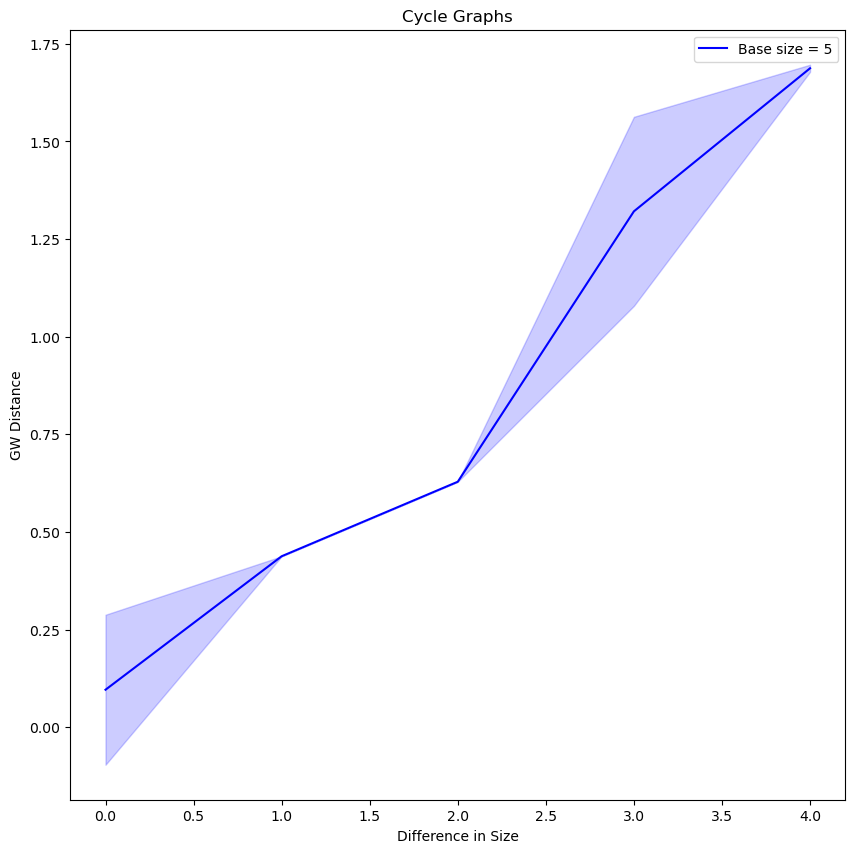

In [2]:
# set parameter for gw_dist growth experiments
base_sizes = [5]
numComparisons = 5
step = 1
title = "Cycle Graphs"
colors = ["blue", "orange", "green", "red", "purple"]
log = gwd_growth_experiment(nx.cycle_graph, base_sizes, step, numComparisons, title, colors, verbose=3, save_transport=True, save_fig=True, iter=5)
